Data Preparation

## This notebook is used to analyze the generated FGT and Breast mask
## NOTE: The code to generate the masks is in another notebook (ispy.ipynb)

In [104]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

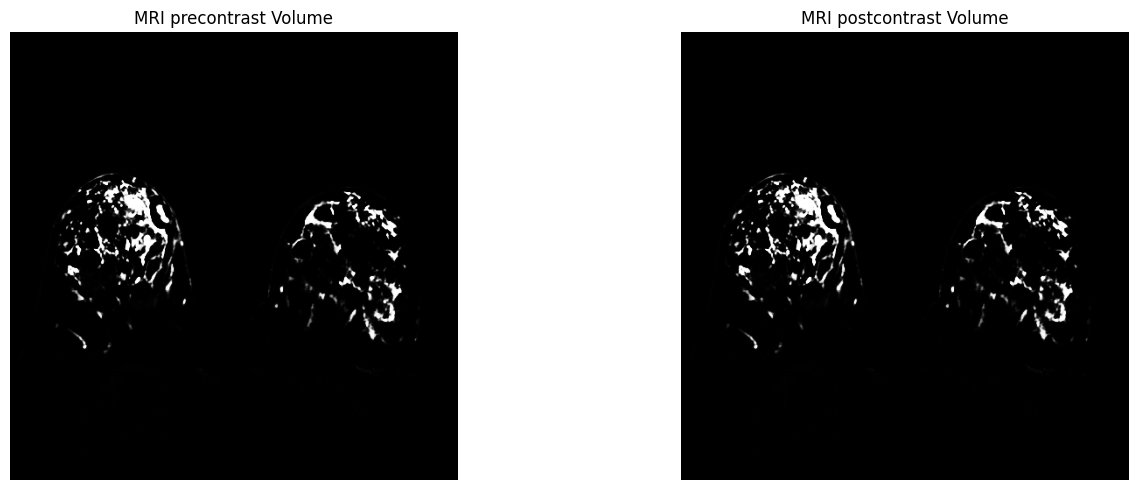

In [140]:
#we are going to only save slice #42 of the output.npy


fgt_seg_42 = np.load('./fgt_pre/output.npy')
slice_42 = fgt_seg_42[:,:,:,42]
#print(slice_42.shape)
np.save('fgt_pre/slice_42_pre.npy', slice_42)
#print('slice 42 saved')

fgt_seg_42_post = np.load('./fgt_post/output.npy')
slice_42_post = fgt_seg_42[:,:,:,42]
np.save('fgt_post/slice_42_post.npy', slice_42_post)
#print('slice 42 saved')

#plotting of the 42nd slice for pre and post
fgt_slice_42_pre = np.load('fgt_pre/slice_42_pre.npy')
#print(fgt_slice_42_pre.ndim)

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].set_title('MRI precontrast Volume')
axes[0].imshow(fgt_slice_42_pre[0,:,:], cmap = 'Greys')
axes[0].axis('off')

fgt_slice_42_post = np.load('fgt_post/slice_42_post.npy')

axes[1].set_title('MRI postcontrast Volume')
axes[1].imshow(fgt_slice_42_post[0,:,:], cmap='Greys')
axes[1].axis('off')

# Show the figure
plt.tight_layout()
plt.show()


In [135]:
#  listing path names for images

pre_path = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/500.000000-ISPY2 AX VIBRANT-SERIES-52523/1-042.dcm'
post_path = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/501.000000-ISPY2 Ph1AX VIBRANT-SERIES-03969/1-042.dcm'
fgt_pre_path = 'fgt_pre/output.npy'
fgt_post_path = 'fgt_post/output.npy'

Masking

(512, 512)


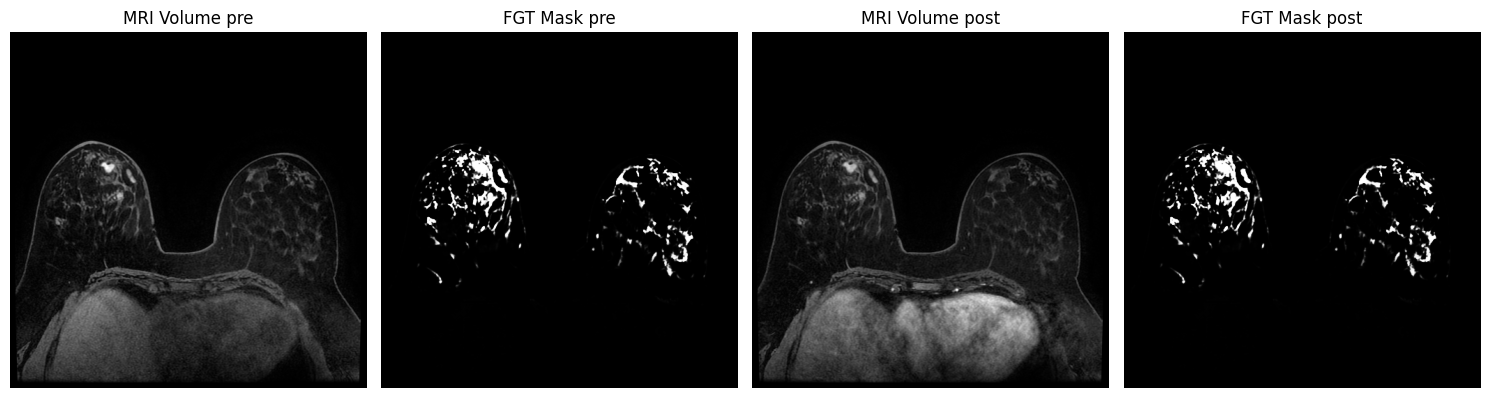

In [141]:


#data preparation and loading
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

pre_contrast_dcm = pydicom.dcmread(pre_path)
post_contrast_dcm = pydicom.dcmread(post_path)

# # Extract image data from the DICOM files
pre_contrast_img = pre_contrast_dcm.pixel_array
print(pre_contrast_img.shape)

# plt.title('MRI  Volume')
# plt.imshow(pre_contrast_img[:,:], cmap = 'gray')
# plt.axis('off')
# plt.show()

post_contrast_img = post_contrast_dcm.pixel_array

# Extract and rotate image data
pre_contrast_img = np.rot90(pre_contrast_dcm.pixel_array, k=2)
post_contrast_img = np.rot90(post_contrast_dcm.pixel_array, k=2)

# plt.title('MRI  Volume')
# plt.imshow(pre_contrast_img[:,:], cmap = 'gray')
# plt.axis('off')
# plt.show()

#fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot pre-contrast DICOM image
# axes[0, 0].imshow(pre_contrast_img[:,:], cmap='gray')
# axes[0, 0].set_title('Pre-Contrast DICOM')


axes[0, 0].set_title('MRI Volume pre')
axes[0, 0].imshow(pre_contrast_img[:,:], cmap = 'gray')
axes[0, 0].axis('off')
#plt.show()



# Plot pre-contrast segmentation
#axes[0, 1].imshow(fgt_pre_path[0,:,:], cmap='Greys')
#axes[0, 1].set_title('Pre-Contrast FGT')


# Plot post-contrast DICOM image
#axes[1, 0].imshow(post_contrast_img, cmap='gray')
#axes[1, 0].set_title('Post-Contrast DICOM')


axes[0, 1].set_title('FGT Mask pre')
axes[0, 1].imshow(fgt_slice_42_pre[0,:,:], cmap = 'Greys')
axes[0, 1].axis('off')


axes[1, 0].set_title('MRI Volume post')
axes[1, 0].imshow(post_contrast_img[:,:], cmap = 'gray')
axes[1, 0].axis('off')

axes[1, 1].set_title('FGT Mask post')
axes[1, 1].imshow(fgt_slice_42_post[0,:,:], cmap = 'Greys')
axes[1, 1].axis('off')


# Plot post-contrast segmentation
#axes[1, 1].imshow(fgt_post_path, cmap='Greys')
#axes[1, 1].set_title('Post-Contrast FGT')

# Adjust layout
plt.tight_layout()
plt.show()


### Now plotting a histogram of the signal intensities for the new pre and post contrast fopr the orginial MRI image

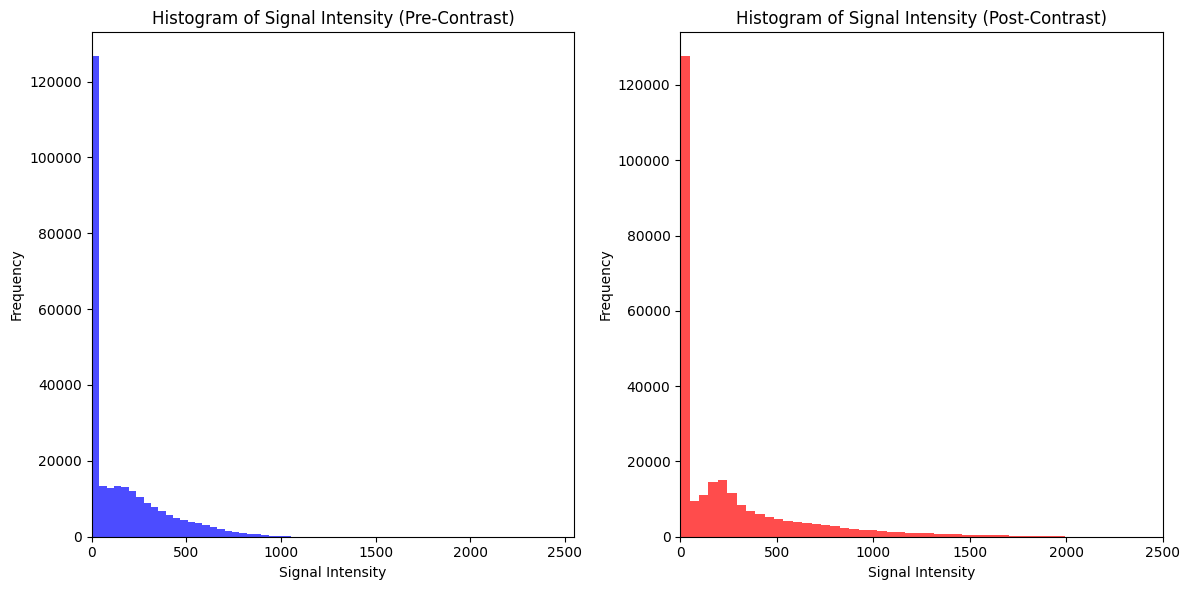

In [108]:


# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for pre-contrast DICOM
plt.subplot(1, 2, 1)
plt.hist(pre_contrast_img.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Signal Intensity (Pre-Contrast)')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(0,2550)

# Histogram for post-contrast DICOM
plt.subplot(1, 2, 2)
plt.hist(post_contrast_img.flatten(), bins=50, color='red', alpha=0.7)
plt.title('Histogram of Signal Intensity (Post-Contrast)')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(0,2500)

# Show the plots
plt.tight_layout()
plt.show()


### pre-post of the original MRI image and pre-post / pre of the original MRI image

MORE GRAPHS FOR VISUALIZATION

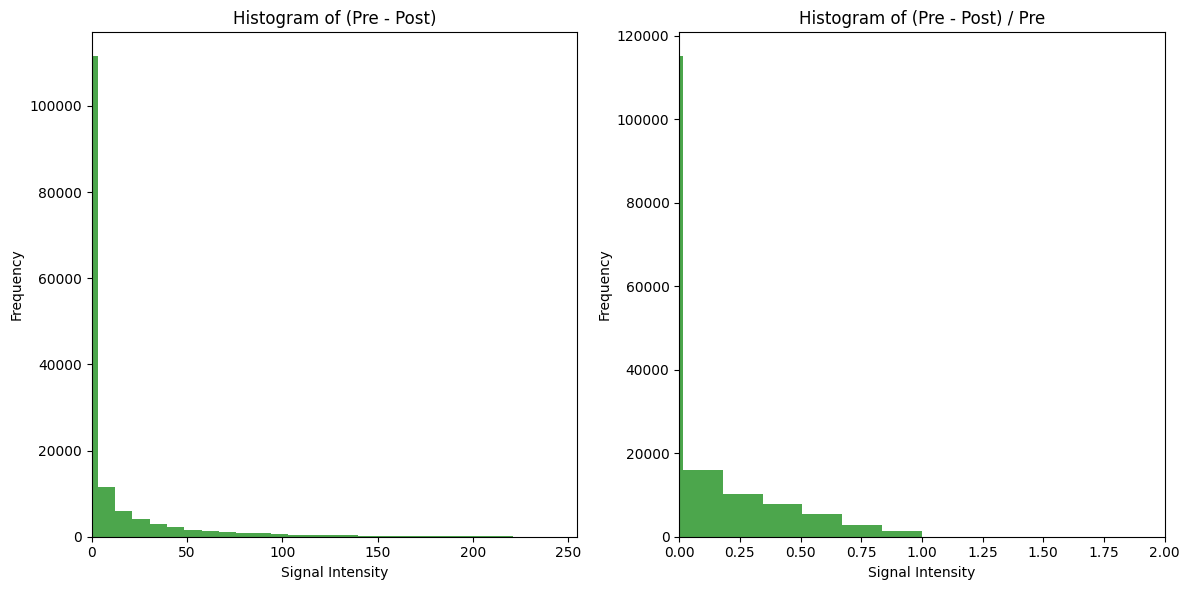

In [109]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming `pre_contrast_img` and `post_contrast_img` are already defined

# Handle divide-by-zero by setting errors to ignore and replacing infinities with NaN
with np.errstate(divide='ignore', invalid='ignore'):
    difference_ratio = np.true_divide(pre_contrast_img - post_contrast_img, pre_contrast_img)
    difference_ratio[~np.isfinite(difference_ratio)] = 0  # Replace inf, -inf, NaN with 0

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for (pre - post)
plt.subplot(1, 2, 1)
plt.hist((pre_contrast_img - post_contrast_img).flatten(), bins=255, color='green', alpha=0.7)
plt.title('Histogram of (Pre - Post)')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(0, 255)  # Set x-axis limit to match 8-bit image range

# Histogram for (pre - post) / pre using the precomputed difference_ratio
plt.subplot(1, 2, 2)
plt.hist(difference_ratio.flatten(), bins=500, color='green', alpha=0.7)
plt.title('Histogram of (Pre - Post) / Pre')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(0,2)

# Show the plots
plt.tight_layout()
plt.show()




### all graphs of original mri image with % cutting

C:\Users\hari\AppData\Local\Temp\ipykernel_391400\325852681.py:11: RuntimeWarning: divide by zero encountered in divide
  ((post_contrast_img - pre_contrast_img) / pre_contrast_img) * 100,
C:\Users\hari\AppData\Local\Temp\ipykernel_391400\325852681.py:11: RuntimeWarning: invalid value encountered in divide
  ((post_contrast_img - pre_contrast_img) / pre_contrast_img) * 100,


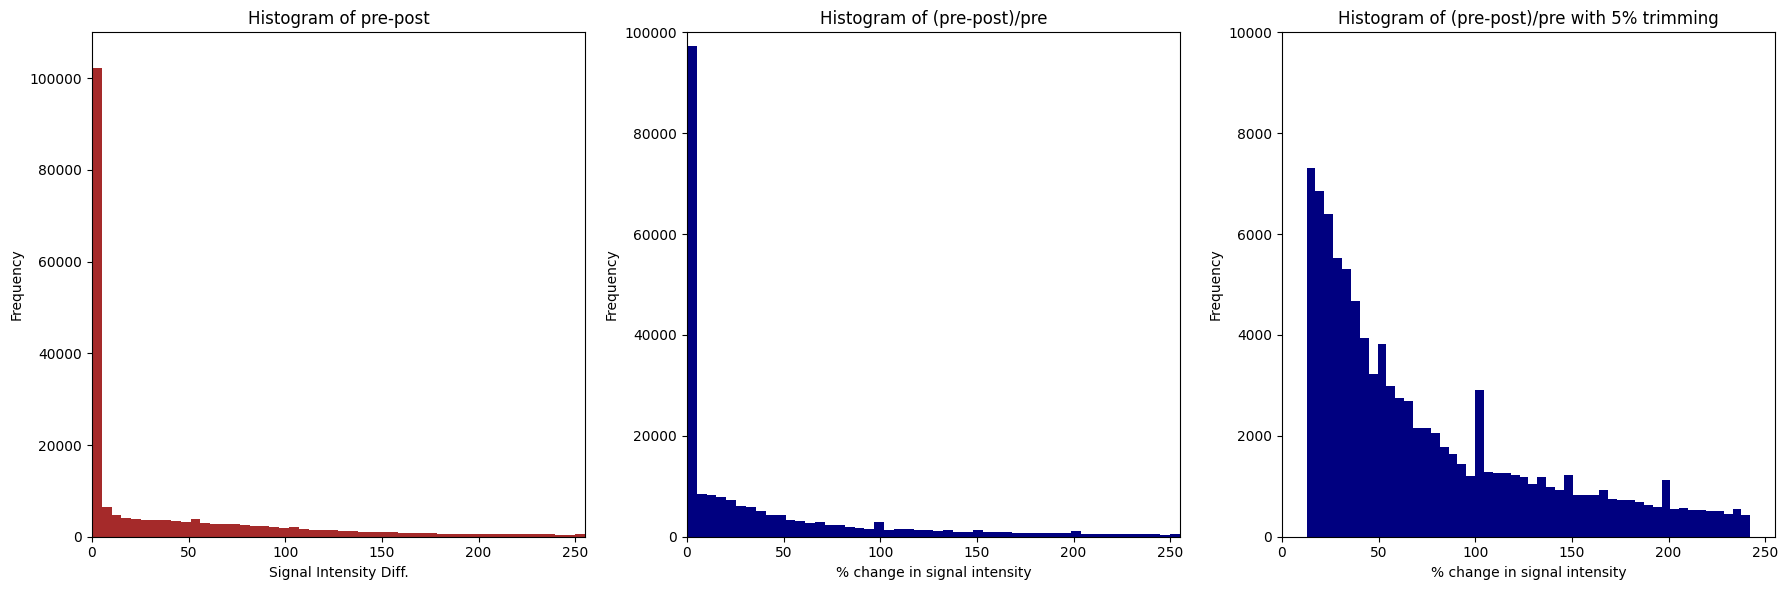

In [110]:
#plotting pre-post subtraction signal intensity

post_contrast_img = post_contrast_img.flatten()
pre_contrast_img = pre_contrast_img.flatten()




# Calculate (pre - post) / pre
percentage_change = np.where(pre_contrast_img != 0, 
                             ((post_contrast_img - pre_contrast_img) / pre_contrast_img) * 100, 
                             0)

plt.figure(figsize=(18, 6))

# Plot 1: Histogram of pre-post
plt.subplot(1, 3, 1)
plt.hist(post_contrast_img - pre_contrast_img, 
         bins=50, 
         color='brown', 
         range=(0, 255), 
         histtype='stepfilled')
plt.title('Histogram of pre-post')
plt.xlabel('Signal Intensity Diff.')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.ylim(0, 110000)

# Plot 2: Histogram of (pre-post)/pre
plt.subplot(1, 3, 2)
plt.hist(percentage_change, 
         bins=50, 
         color='navy', 
         range=(0, 255), 
         histtype='stepfilled')
plt.title('Histogram of (pre-post)/pre')
plt.xlabel('% change in signal intensity')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.ylim(0, 100000)

# Plot 3: Histogram of (pre-post)/pre with 5% trimming
plt.subplot(1, 3, 3)
plt.hist(percentage_change, bins=50, color='navy', range=(12.75, 242.25), histtype='stepfilled')

# Set xlim to show blank areas for the trimmed regions
plt.title('Histogram of (pre-post)/pre with 5% trimming')
plt.xlabel('% change in signal intensity')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.ylim(0, 10000)

# Show the plots
plt.tight_layout()
plt.show()




### calculation of breast volume

In [111]:
#total pixels in breast mask

mask = np.load('mask/output.npy')

# Calculate the total number of voxels
total_voxels = mask.size

print(f"Total number of voxels: {total_voxels}")


Total number of voxels: 27787264


In [112]:
mask.shape

#dimensions of one singular voxel

#avg volume of breast volume in mm^3: 300,000 mm^3

(512, 512, 106)

In [127]:

# Calculate the volume of a single voxel (in cubic millimeters)
voxel_volume_mm3 = 512*512*106

# Calculate the total breast volume in cubic millimeters
breast_volume_mm3 = mask.size * voxel_volume_mm3


print(f"Total breast volume: {breast_volume_mm3} cubic millimeters")


Total breast volume: 772132040605696 cubic millimeters


### fgt pre and post calculations

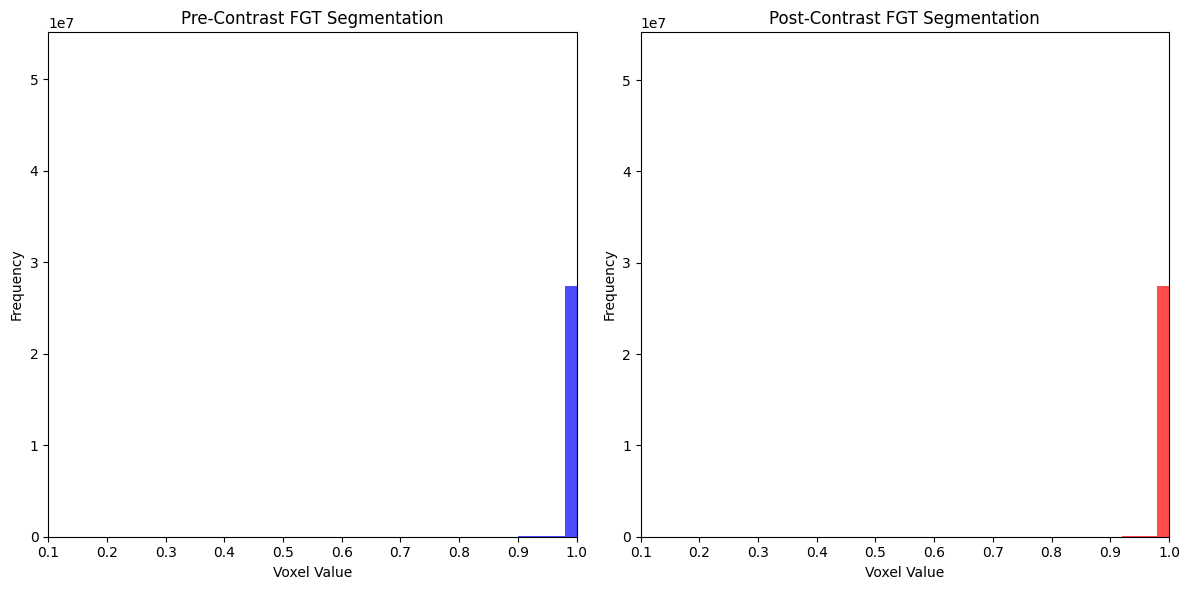

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Load the 4D FGT segmentations
pre_contrast_fgt_4d = np.load('fgt_pre/output.npy')
post_contrast_fgt_4d = np.load('fgt_post/output.npy')

# Choose the relevant 3D slice if the segmentations are 4D
# For this example, assuming the loaded data is already 3D
pre_contrast_fgt = pre_contrast_fgt_4d  # Adjust if needed
post_contrast_fgt = post_contrast_fgt_4d  # Adjust if needed

# Flatten the masks for histogram plotting
pre_contrast_fgt_flat = pre_contrast_fgt.flatten()
post_contrast_fgt_flat = post_contrast_fgt.flatten()

# Plot histograms of the FGT segmentations
plt.figure(figsize=(12, 6))

# Histogram for pre-contrast FGT segmentation
plt.subplot(1, 2, 1)
plt.hist(pre_contrast_fgt_flat, bins=50, color='blue', alpha=0.7)
plt.title('Pre-Contrast FGT Segmentation')
plt.xlabel('Voxel Value')
plt.ylabel('Frequency')
plt.xlim(0.1,1)  # Adjust xlim based on data range
plt.ylim(0, np.max(np.histogram(pre_contrast_fgt_flat, bins=50)[0]))

# Histogram for post-contrast FGT segmentation
plt.subplot(1, 2, 2)
plt.hist(post_contrast_fgt_flat, bins=50, color='red', alpha=0.7)
plt.title('Post-Contrast FGT Segmentation')
plt.xlabel('Voxel Value')
plt.ylabel('Frequency')
plt.xlim(0.1,1)  # Adjust xlim based on data range
plt.ylim(0, np.max(np.histogram(post_contrast_fgt_flat, bins=50)[0]))  



# Show the plots
plt.tight_layout()
plt.show()



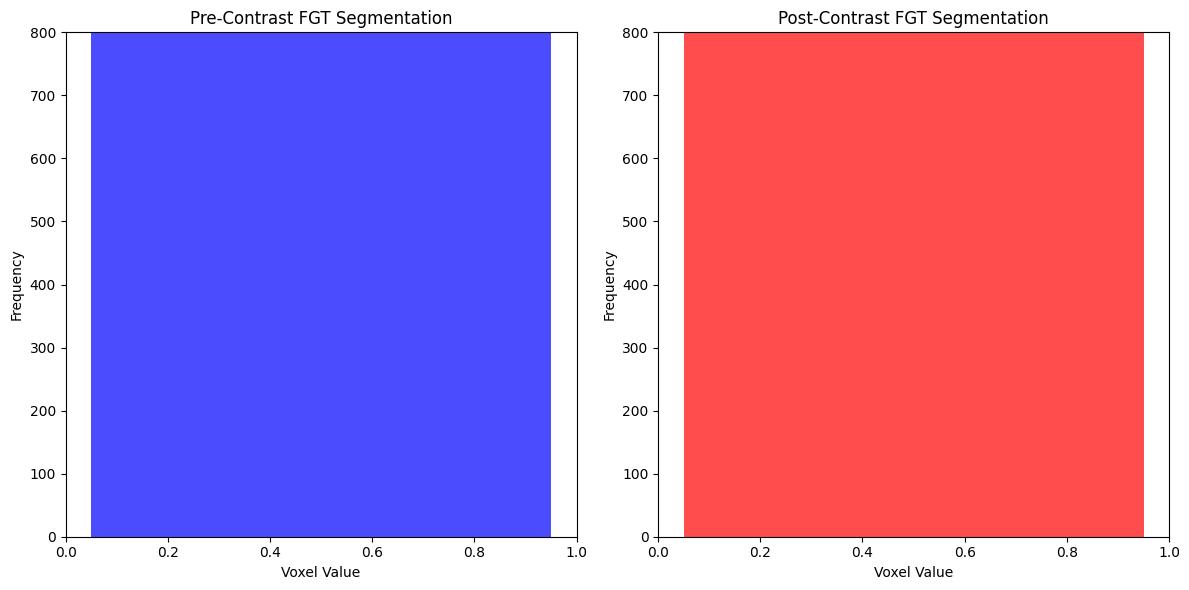

In [138]:

# Plot histograms of the FGT segmentations
plt.figure(figsize=(12, 6))


# Histogram for pre-contrast FGT segmentation
plt.subplot(1, 2, 1)
plt.hist(pre_contrast_fgt_flat, range = (0.05, 0.95), bins=50, color='blue', alpha=0.7)
plt.title('Pre-Contrast FGT Segmentation')
plt.xlabel('Voxel Value')
plt.ylabel('Frequency')

plt.xlim(0,1)  # Adjust xlim based on data range
plt.ylim(0, 800)

# Histogram for post-contrast FGT segmentation
plt.subplot(1,2,2)
plt.hist(post_contrast_fgt_flat, range = (0.05, 0.95), bins=50, color='red', alpha=0.7)
plt.title('Post-Contrast FGT Segmentation')
plt.xlabel('Voxel Value')
plt.ylabel('Frequency')
plt.xlim(0,1)  # Adjust xlim based on data range
plt.ylim(0, 800)



# Show the plots
plt.tight_layout()
plt.show()


Finally, we are going to calculate BPE (WORK IN PROGRESS)

Final BPE calculation

In [121]:
import numpy as np

# Load the pre-contrast and post-contrast slices
pre_contrast = np.load('fgt_pre/slice_42_pre.npy')
post_contrast = np.load('fgt_post/slice_42_post.npy')

# Calculate the mean of the pre-contrast slice
mean_pre_contrast = np.mean(pre_contrast)

# Calculate the BPE percentage
bpe_percentage = (np.mean(post_contrast - pre_contrast) / mean_pre_contrast) * 100

print(f"BPE Percentage: {bpe_percentage:.2f}%")



BPE Percentage: 0.00%


In [128]:
print(post_contrast)
print(pre_contrast)
print(post_contrast-pre_contrast)

[[[9.9951e-01 9.9951e-01 9.9854e-01 ... 9.9854e-01 9.9854e-01 9.9658e-01]
  [9.9854e-01 9.9951e-01 9.9951e-01 ... 9.9951e-01 9.9951e-01 9.9854e-01]
  [9.9854e-01 9.9951e-01 9.9951e-01 ... 9.9951e-01 9.9951e-01 9.9854e-01]
  ...
  [1.0000e+00 1.0000e+00 1.0000e+00 ... 1.0000e+00 1.0000e+00 9.9951e-01]
  [1.0000e+00 1.0000e+00 1.0000e+00 ... 1.0000e+00 1.0000e+00 9.9951e-01]
  [9.9951e-01 1.0000e+00 1.0000e+00 ... 1.0000e+00 1.0000e+00 9.9951e-01]]

 [[1.9550e-05 3.6061e-05 6.9439e-05 ... 1.1915e-04 1.1224e-04 4.0317e-04]
  [5.6565e-05 4.9829e-05 4.8459e-05 ... 4.0770e-05 3.3021e-05 2.7537e-04]
  [5.3704e-05 5.1320e-05 3.8564e-05 ... 3.7253e-05 4.4405e-05 2.4319e-04]
  ...
  [4.2319e-06 1.0729e-06 2.3842e-07 ... 2.3842e-07 6.5565e-07 1.1683e-05]
  [9.5367e-06 3.2783e-06 7.1526e-07 ... 4.1723e-07 1.0729e-06 1.2517e-05]
  [4.2975e-05 1.0729e-05 3.5167e-06 ... 3.2783e-06 4.2915e-06 2.4498e-05]]

 [[6.3324e-04 6.5374e-04 1.0347e-03 ... 1.1587e-03 9.1600e-04 2.7142e-03]
  [7.8201e-04 4.3392e-